In [3]:
import pandas as pd

In [5]:
df = pd.read_excel('ghg_emissions_final.xlsx')

In [7]:
df

,Date,iso,Country,unit,Emissions
0,1990-01-01,AFG,Afghanistan,MtCO2e,9.24
1,1991-01-01,AFG,Afghanistan,MtCO2e,9.51
2,1992-01-01,AFG,Afghanistan,MtCO2e,9.16
3,1993-01-01,AFG,Afghanistan,MtCO2e,9.29
4,1994-01-01,AFG,Afghanistan,MtCO2e,9.34
...,...,...,...,...,...
6171,2017-01-01,ZWE,Zimbabwe,MtCO2e,115.43
6172,2018-01-01,ZWE,Zimbabwe,MtCO2e,117.17
6173,2019-01-01,ZWE,Zimbabwe,MtCO2e,116.07
6174,2020-01-01,ZWE,Zimbabwe,MtCO2e,113.33


In [4]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Date         0
iso          0
Country      0
unit         0
Emissions    0
dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

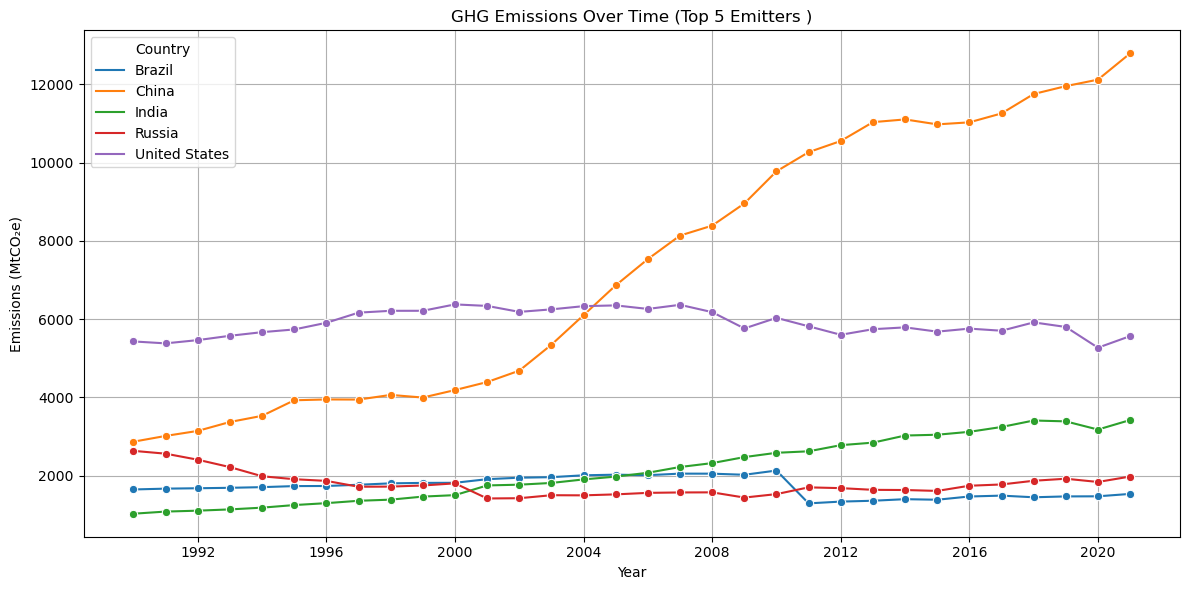

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use only a manageable number of countries for line plot — e.g., Top 5 + Qatar
latest_year = df['Date'].max()
top_5 = df[df['Date'] == latest_year].sort_values(by='Emissions', ascending=False).head(5)['Country'].tolist()

# Include Qatar manually
focus_countries = top_5 

# Filter dataset
focus_df = df[df['Country'].isin(focus_countries)]

# Plot emissions over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=focus_df, x='Date', y='Emissions', hue='Country', marker='o')
plt.title("GHG Emissions Over Time (Top 5 Emitters )")
plt.ylabel("Emissions (MtCO₂e)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
df['Growth_Rate'] = df.groupby('Country')['Emissions'].pct_change() * 100

In [13]:
df[df['Date'] == '1/1/2021'].sort_values(by='Emissions', ascending=False).head(10)

,Date,iso,Country,unit,Emissions,Growth_Rate
1151,2021-01-01,CHN,China,MtCO2e,12791.58,5.544050
5919,2021-01-01,USA,United States,MtCO2e,5564.83,5.622356
2527,2021-01-01,IND,India,MtCO2e,3419.89,7.678139
4607,2021-01-01,RUS,Russia,MtCO2e,1975.57,7.555572
767,2021-01-01,BRA,Brazil,MtCO2e,1531.51,4.166638
2559,2021-01-01,IDN,Indonesia,MtCO2e,1484.66,0.207210
2783,2021-01-01,JPN,Japan,MtCO2e,1071.59,0.677390
2591,2021-01-01,IRN,Iran,MtCO2e,952.23,4.826121
1023,2021-01-01,CAN,Canada,MtCO2e,733.27,1.658094
4799,2021-01-01,SAU,Saudi Arabia,MtCO2e,730.64,3.129279


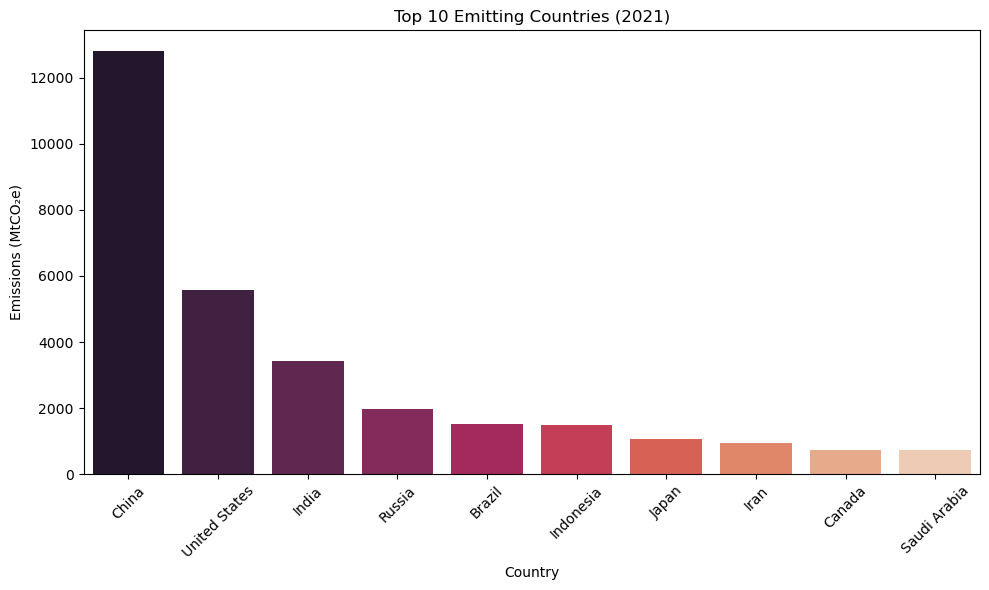

In [15]:
top_2021 = df[df['Date'] == '1/1/2021'].sort_values(by='Emissions', ascending=False).head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top_2021, x='Country', y='Emissions', palette='rocket')
plt.title("Top 10 Emitting Countries (2021)")
plt.ylabel("Emissions (MtCO₂e)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


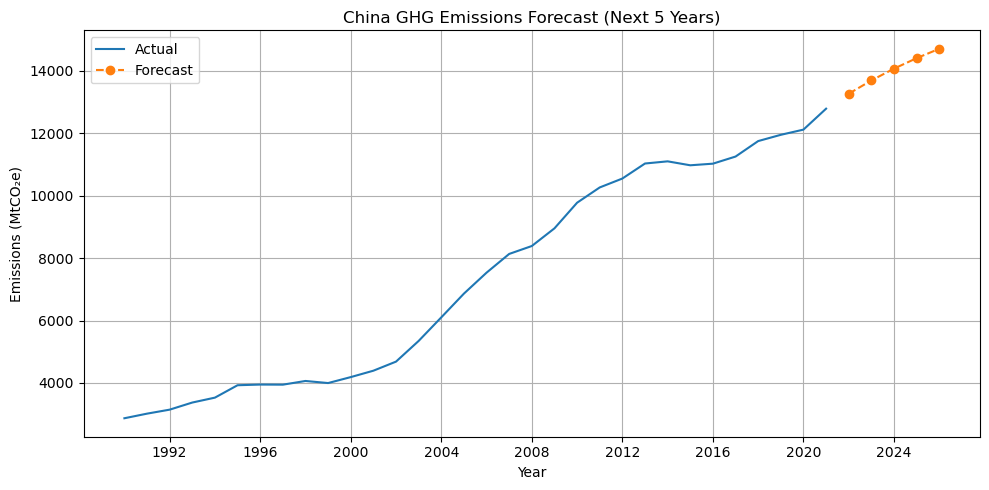

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible 

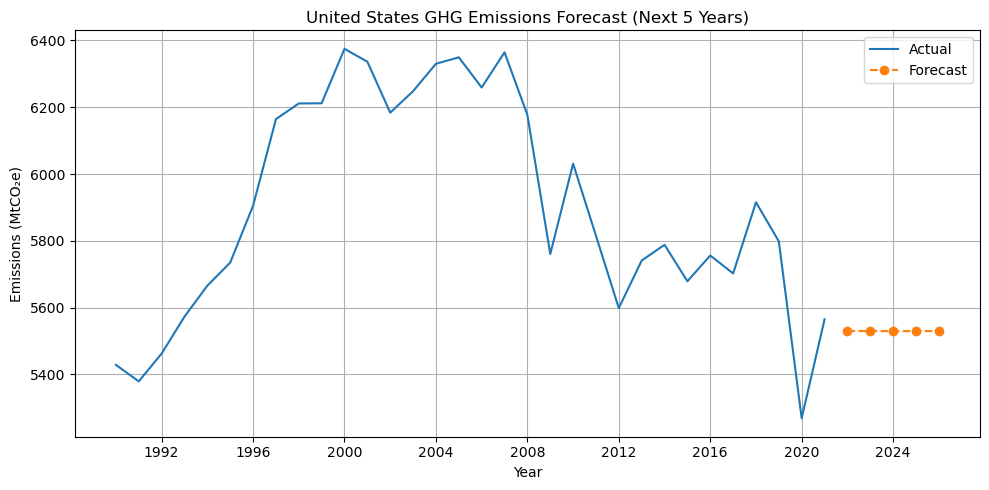

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible 

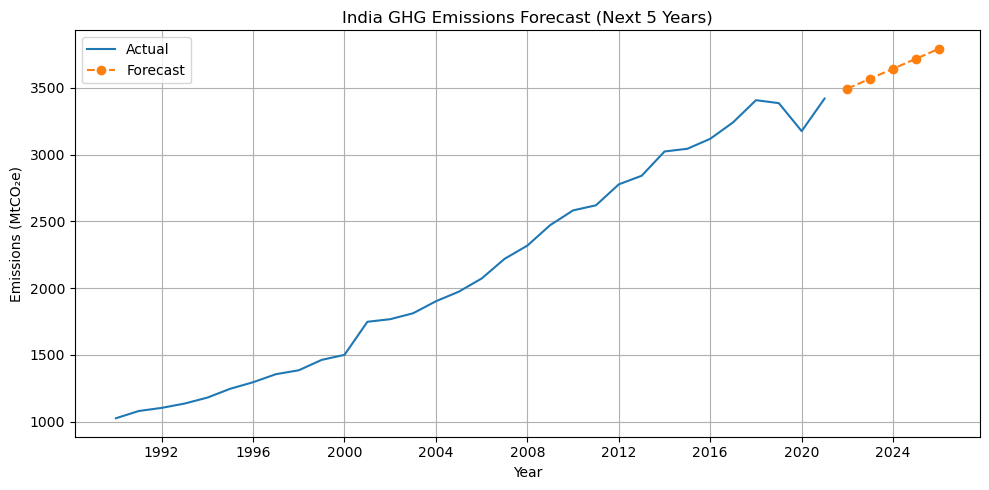

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


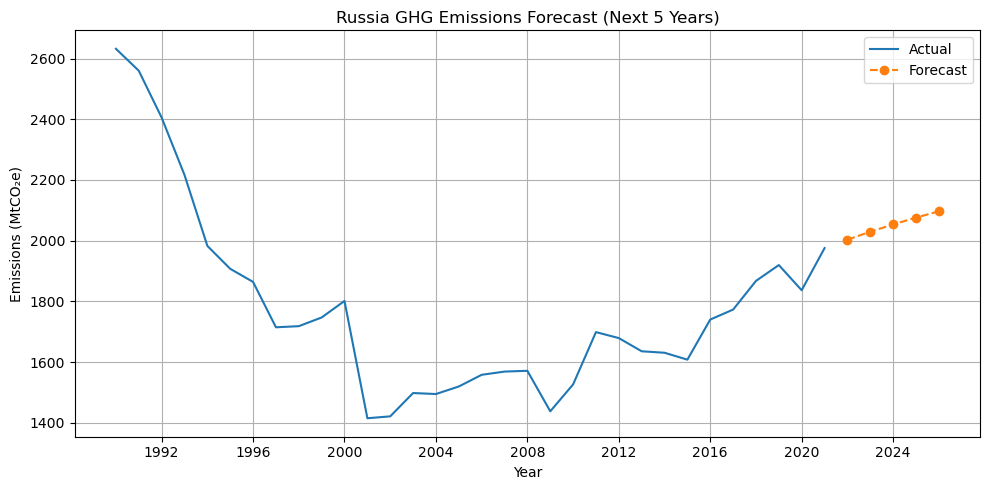

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


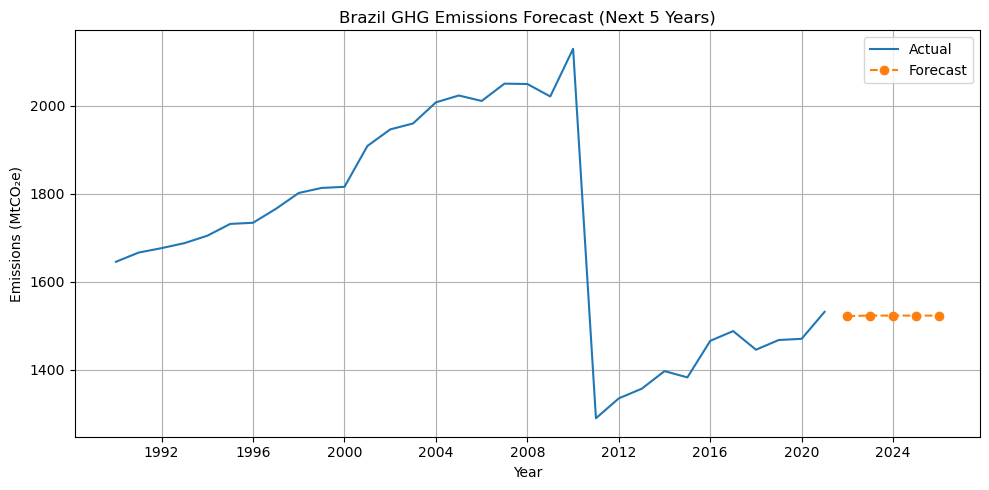

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


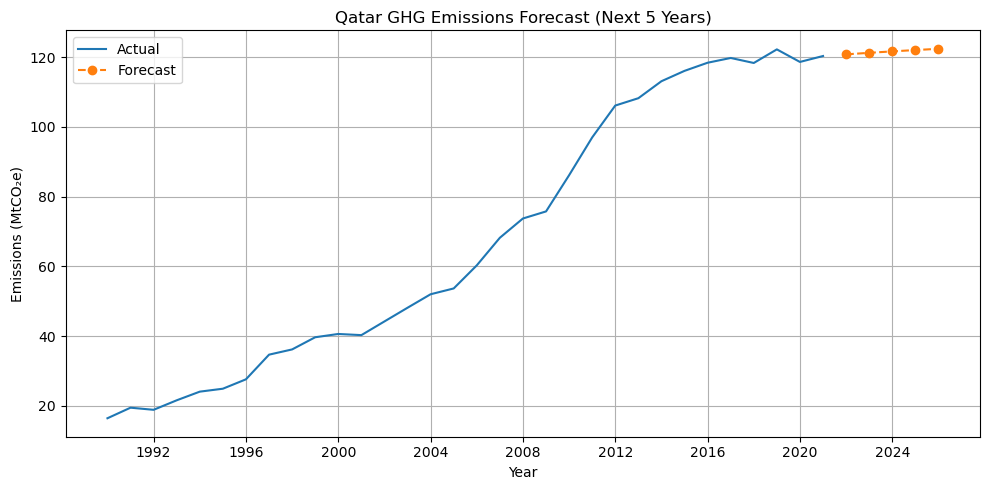

In [29]:
# Loop through each country
from statsmodels.tsa.arima.model import ARIMA
forecast_results = []  # ✅ Initialize list


# Get top 5 emitters by latest year
latest_year = df['Date'].max()
top_5 = df[df['Date'] == latest_year].sort_values(by='Emissions', ascending=False).head(5)['Country'].tolist()

# Ensure Qatar is included
if 'Qatar' not in top_5:
    top_5.append('Qatar')

countries = top_5


for country in countries:
    try:
        ts = df[df['Country'] == country].set_index('Date')['Emissions'].dropna()

        # Fit ARIMA
        model = ARIMA(ts, order=(1, 1, 1))
        model_fit = model.fit()

        # Forecast 5 years
        forecast = model_fit.forecast(steps=5)
        forecast_dates = pd.date_range(start=ts.index.max() + pd.DateOffset(years=1), periods=5, freq='YS')

        # Combine into DataFrame
        forecast_df = pd.DataFrame({
            'Country': country,
            'Date': forecast_dates,
            'Forecasted_Emissions': forecast.values
        })

        forecast_results.append(forecast_df)

        # Plot actual + forecast
        plt.figure(figsize=(10, 5))
        plt.plot(ts, label='Actual')
        plt.plot(forecast_dates, forecast, label='Forecast', linestyle='--', marker='o')
        plt.title(f"{country} GHG Emissions Forecast (Next 5 Years)")
        plt.xlabel("Year")
        plt.ylabel("Emissions (MtCO₂e)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Could not forecast {country}: {e}")


In [31]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Select one country to evaluate — e.g., Qatar
country = 'Qatar'
ts = df[df['Country'] == country].set_index('Date')['Emissions'].dropna()

# Split last 5 years as test set, the rest as training
train = ts[:-5]
test = ts[-5:]

# Fit ARIMA on training set
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecast for test period
forecast = model_fit.forecast(steps=5)

# Calculate Metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

# Print results
print(f"ARIMA Evaluation for {country}:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


ARIMA Evaluation for Qatar:
MAE:  7.63
RMSE: 8.65
MAPE: 6.37%


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [39]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Define the countries you want to evaluate
latest_year = df['Date'].max()
top_5 = df[df['Date'] == latest_year].sort_values(by='Emissions', ascending=False).head(5)['Country'].tolist()
if 'Qatar' not in top_5:
    top_5.append('Qatar')

# Store results
evaluation_results = []

# Loop through each selected country
for country in top_5:
    try:
        ts = df[df['Country'] == country].set_index('Date')['Emissions'].dropna()

        # Only proceed if we have at least 10 years of data
        if len(ts) < 10:
            print(f"Not enough data to evaluate {country}")
            continue

        # Split data
        train = ts[:-5]
        test = ts[-5:]

        # Fit ARIMA
        model = ARIMA(train, order=(1, 1, 1))
        model_fit = model.fit()

        # Forecast
        forecast = model_fit.forecast(steps=5)

        # Compute metrics
        mae = mean_absolute_error(test, forecast)
        rmse = np.sqrt(mean_squared_error(test, forecast))
        mape = np.mean(np.abs((test - forecast) / test)) * 100

        # Store result
        evaluation_results.append({
            'Country': country,
            'MAE': round(mae, 2),
            'RMSE': round(rmse, 2),
            'MAPE': round(mape, 2)
        })

    except Exception as e:
        print(f"⚠️ Could not evaluate {country}: {e}")

# ✅ Convert to DataFrame and display
metrics_df = pd.DataFrame(evaluation_results)
display(metrics_df)


,Country,MAE,RMSE,MAPE
0,China,886.28,1006.69,7.25
1,United States,183.96,240.85,3.35
2,India,115.64,152.56,3.53
3,Russia,103.18,124.33,5.37
4,Brazil,30.26,39.39,2.01
5,Qatar,7.63,8.65,6.37


In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# ---------- Step 1: Define Target Countries ----------
latest_year = df['Date'].max()
top_5 = df[df['Date'] == latest_year].sort_values(by='Emissions', ascending=False).head(5)['Country'].tolist()
if 'Qatar' not in top_5:
    top_5.append('Qatar')

# ---------- Step 2: Add Lag Features ----------
df_lagged = df.copy()
df_lagged['Year'] = pd.to_datetime(df_lagged['Date']).dt.year

# Add 1-year and 2-year lag of emissions
df_lagged['Lag_1'] = df_lagged.groupby('Country')['Emissions'].shift(1)
df_lagged['Lag_2'] = df_lagged.groupby('Country')['Emissions'].shift(2)

# Drop rows with missing lag values
df_lagged = df_lagged.dropna()

# ---------- Step 3: Add Region Column ----------
region_map = {
    'Qatar': 'Asia',
    'China': 'Asia',
    'India': 'Asia',
    'United States': 'North America',
    'Russia': 'Europe',
    'Brazil': 'South America'
}
df_lagged['Region'] = df_lagged['Country'].map(region_map)

# ---------- Step 4: Encode Categorical Columns ----------
le_country = LabelEncoder()
df_lagged['Country_Code'] = le_country.fit_transform(df_lagged['Country'])

le_region = LabelEncoder()
df_lagged['Region_Code'] = le_region.fit_transform(df_lagged['Region'])

# ---------- Step 5: Evaluate Random Forest ----------
results = []
features = ['Year', 'Country_Code', 'Region_Code', 'Lag_1', 'Lag_2']
target = 'Emissions'

for country in top_5:
    try:
        country_df = df_lagged[df_lagged['Country'] == country].dropna()
        if len(country_df) < 10:
            print(f"Not enough data for {country}")
            continue

        # Train/Test Split
        train_df = country_df[:-5]
        test_df = country_df[-5:]

        X_train = train_df[features]
        y_train = train_df[target]
        X_test = test_df[features]
        y_test = test_df[target]

        # Train Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)

        # Predict and evaluate
        pred = rf.predict(X_test)
        mae = mean_absolute_error(y_test, pred)
        rmse = np.sqrt(mean_squared_error(y_test, pred))
        mape = np.mean(np.abs((y_test - pred) / y_test)) * 100

        # Store metrics
        results.append({
            'Country': country,
            'MAE': round(mae, 2),
            'RMSE': round(rmse, 2),
            'MAPE': round(mape, 2)
        })

    except Exception as e:
        print(f" Could not evaluate {country}: {e}")

# ---------- Step 6: Display Results ----------
rf_improved_df = pd.DataFrame(results)
display(rf_improved_df)


,Country,MAE,RMSE,MAPE
0,China,967.17,1091.98,7.91
1,United States,175.77,233.91,3.21
2,India,232.93,252.93,6.92
3,Russia,196.47,213.02,10.33
4,Brazil,35.53,45.75,2.36
5,Qatar,2.43,2.80,2.02


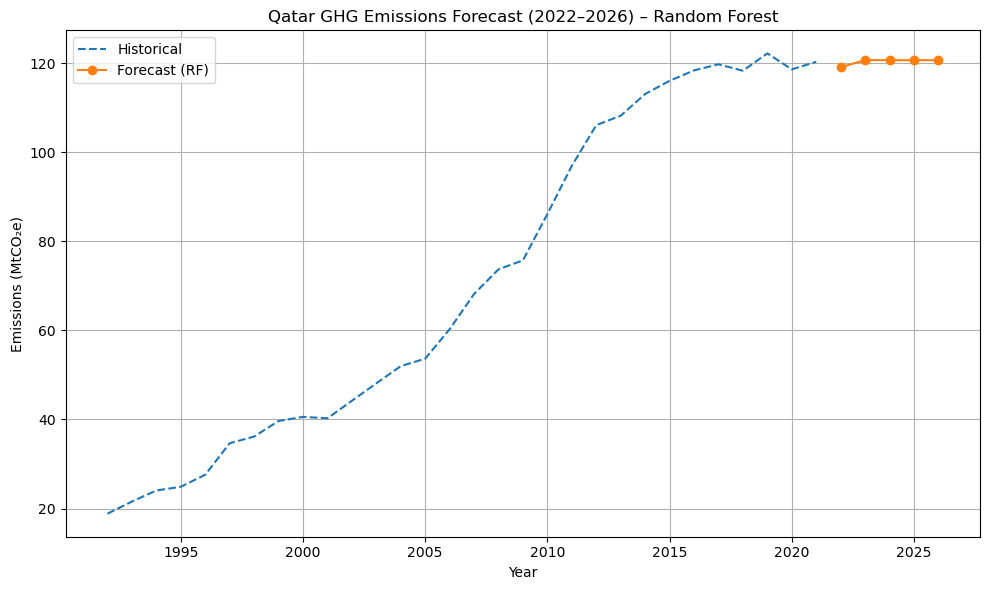

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# ---- Step 1: Preprocess the full dataset ----
df = df.copy()
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Add lag features
df['Lag_1'] = df.groupby('Country')['Emissions'].shift(1)
df['Lag_2'] = df.groupby('Country')['Emissions'].shift(2)

# Map region
region_map = {
    'Qatar': 'Asia',
    'China': 'Asia',
    'India': 'Asia',
    'United States': 'North America',
    'Russia': 'Europe',
    'Brazil': 'South America'
}
df['Region'] = df['Country'].map(region_map)

# Encode categorical variables
df['Country_Code'] = LabelEncoder().fit_transform(df['Country'].astype(str))
df['Region_Code'] = LabelEncoder().fit_transform(df['Region'].astype(str))

# Drop missing values from lagged rows
df_lagged = df.dropna()

# ---- Step 2: Prepare Qatar data ----
qatar_df = df_lagged[df_lagged['Country'] == 'Qatar']

features = ['Year', 'Country_Code', 'Region_Code', 'Lag_1', 'Lag_2']
target = 'Emissions'

# Train model on full Qatar data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(qatar_df[features], qatar_df[target])

# ---- Step 3: Forecast for 2022–2026 ----
future_years = range(qatar_df['Year'].max() + 1, qatar_df['Year'].max() + 6)
last_row = qatar_df.iloc[-1].copy()

future_rows = []

for year in future_years:
    new_input = {
        'Year': year,
        'Country_Code': last_row['Country_Code'],
        'Region_Code': last_row['Region_Code'],
        'Lag_1': last_row['Emissions'],
        'Lag_2': last_row['Lag_1']
    }
    predicted = rf.predict(pd.DataFrame([new_input]))[0]
    new_input['Predicted_Emissions'] = predicted
    new_input['Year'] = year
    future_rows.append(new_input)

    # update lag history
    last_row['Lag_2'] = last_row['Lag_1']
    last_row['Lag_1'] = predicted
    last_row['Emissions'] = predicted

# ---- Step 4: Plot ----
future_df = pd.DataFrame(future_rows)

plt.figure(figsize=(10, 6))
plt.plot(qatar_df['Year'], qatar_df['Emissions'], label='Historical', linestyle='--')
plt.plot(future_df['Year'], future_df['Predicted_Emissions'], label='Forecast (RF)', marker='o')
plt.title('Qatar GHG Emissions Forecast (2022–2026) – Random Forest')
plt.xlabel('Year')
plt.ylabel('Emissions (MtCO₂e)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
final_forecast_5yr = pd.concat(forecast_results).reset_index(drop=True)

grouped = final_forecast_5yr.groupby('Country')

for country, group in grouped:
    print(f"\n{country} Forecast (Next 5 Years):")
    print(group[['Date', 'Forecasted_Emissions']].set_index('Date'))



China Forecast (Next 5 Years):
            Forecasted_Emissions
Date                            
2022-01-01          13270.106608
2023-01-01          13695.808785
2024-01-01          14074.517808
2025-01-01          14411.421237
2026-01-01          14711.133983

India Forecast (Next 5 Years):
            Forecasted_Emissions
Date                            
2022-01-01           3494.416252
2023-01-01           3568.940829
2024-01-01           3643.463731
2025-01-01           3717.984959
2026-01-01           3792.504513

Qatar Forecast (Next 5 Years):
            Forecasted_Emissions
Date                            
2022-01-01            120.783938
2023-01-01            121.225327
2024-01-01            121.636404
2025-01-01            122.019250
2026-01-01            122.375804

Russia Forecast (Next 5 Years):
            Forecasted_Emissions
Date                            
2022-01-01           2003.456961
2023-01-01           2029.389495
2024-01-01           2053.504576
2025-01-01   

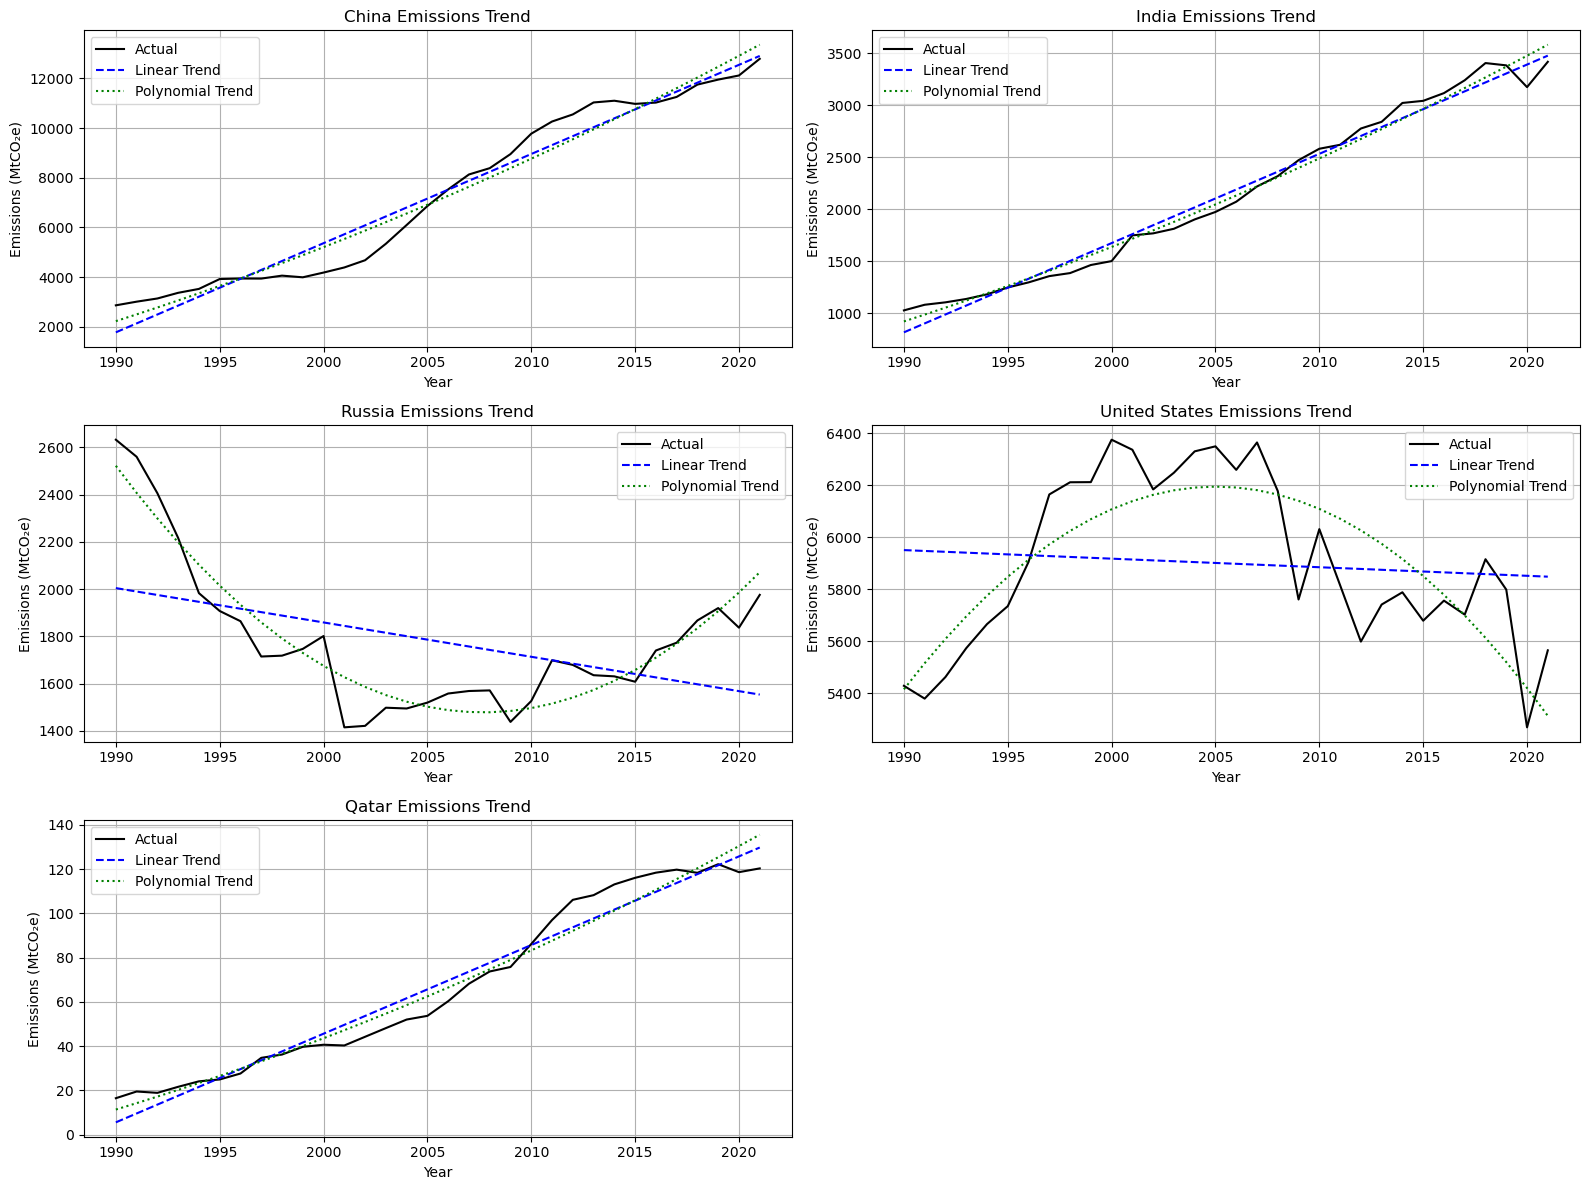

In [21]:
import numpy as np 
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Country', 'Date'])

# List of countries to visualize
countries = ['China', 'India', 'Russia', 'United States', 'Qatar']

# Set up 1 subplot per country
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axs = axs.flatten()

for i, country in enumerate(countries):
    # Filter and prepare
    ts = df[df['Country'] == country][['Date', 'Emissions']].dropna()
    ts['Year'] = ts['Date'].dt.year

    # Linear Regression Fit (degree 1)
    z1 = np.polyfit(ts['Year'], ts['Emissions'], 1)
    p1 = np.poly1d(z1)

    # Polynomial Regression Fit (degree 2)
    z2 = np.polyfit(ts['Year'], ts['Emissions'], 2)
    p2 = np.poly1d(z2)

    # Plot
    ax = axs[i]
    ax.plot(ts['Year'], ts['Emissions'], label='Actual', color='black')
    ax.plot(ts['Year'], p1(ts['Year']), '--', label='Linear Trend', color='blue')
    ax.plot(ts['Year'], p2(ts['Year']), ':', label='Polynomial Trend', color='green')

    ax.set_title(f'{country} Emissions Trend')
    ax.set_xlabel("Year")
    ax.set_ylabel("Emissions (MtCO₂e)")
    ax.legend()
    ax.grid(True)

# Hide empty subplot if countries < 6
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

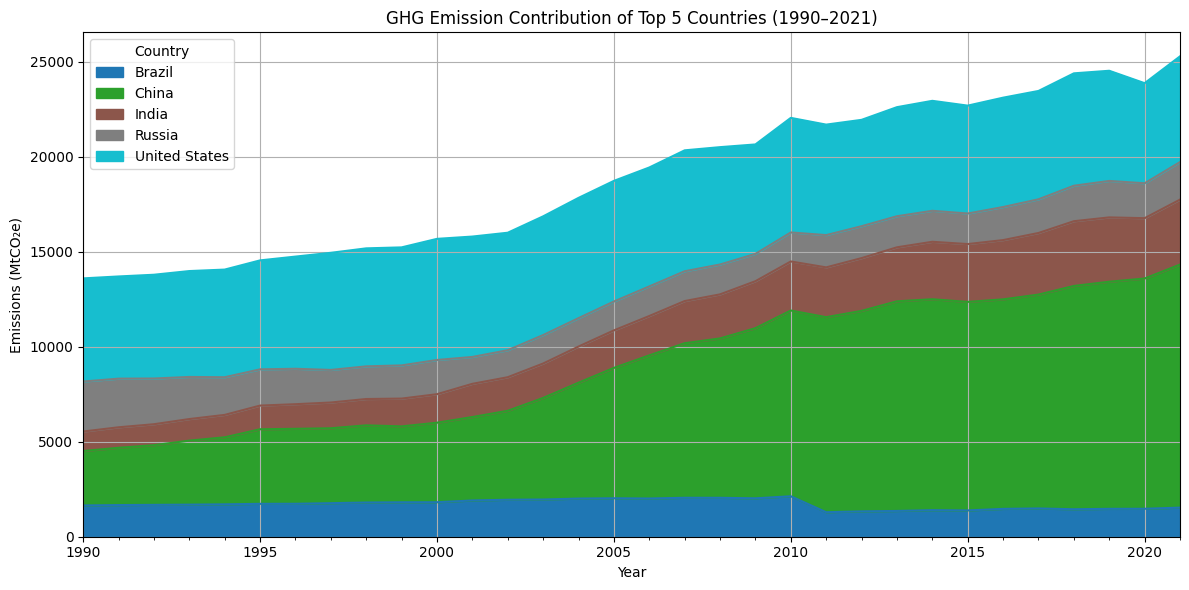

In [18]:

# Get top 5 countries in 2021 by emissions
top5 = df[df['Date'] == '1/1/2021'].sort_values(by='Emissions', ascending=False)['Country'].unique()[:5]
df_top5 = df[df['Country'].isin(top5)]

# Pivot for stacked area chart
area_data = df_top5.pivot_table(index='Date', columns='Country', values='Emissions', aggfunc='sum')

# Plot
area_data.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title("GHG Emission Contribution of Top 5 Countries (1990–2021)")
plt.xlabel("Year")
plt.ylabel("Emissions (MtCO₂e)")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.show()

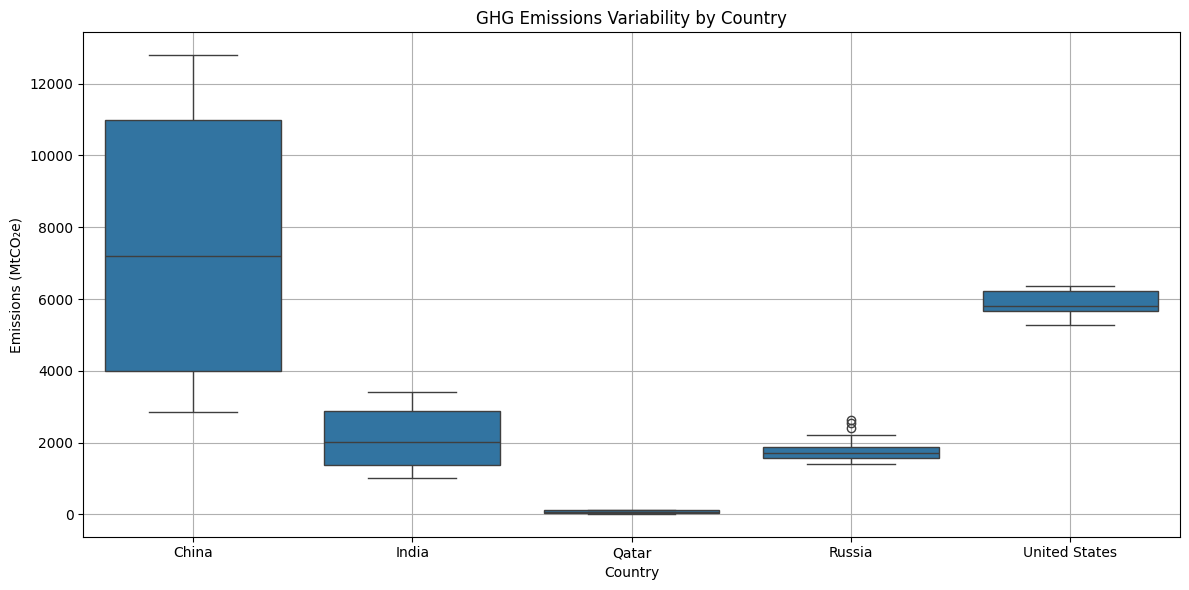

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare emission ranges for each country
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['Country'].isin(focus)], x='Country', y='Emissions')
plt.title("GHG Emissions Variability by Country")
plt.ylabel("Emissions (MtCO₂e)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
df

,Date,iso,Country,unit,Emissions,Growth_Rate
0,1990-01-01,AFG,Afghanistan,MtCO2e,9.24,NaN
1,1991-01-01,AFG,Afghanistan,MtCO2e,9.51,2.922078
2,1992-01-01,AFG,Afghanistan,MtCO2e,9.16,-3.680336
3,1993-01-01,AFG,Afghanistan,MtCO2e,9.29,1.419214
4,1994-01-01,AFG,Afghanistan,MtCO2e,9.34,0.538213
...,...,...,...,...,...,...
6171,2017-01-01,ZWE,Zimbabwe,MtCO2e,115.43,-0.250605
6172,2018-01-01,ZWE,Zimbabwe,MtCO2e,117.17,1.507407
6173,2019-01-01,ZWE,Zimbabwe,MtCO2e,116.07,-0.938807
6174,2020-01-01,ZWE,Zimbabwe,MtCO2e,113.33,-2.360644


In [23]:
df['Date'] = pd.to_datetime(df['Date'])   # ensure Date is datetime
df['Year'] = df['Date'].dt.year           # extract Year from Date


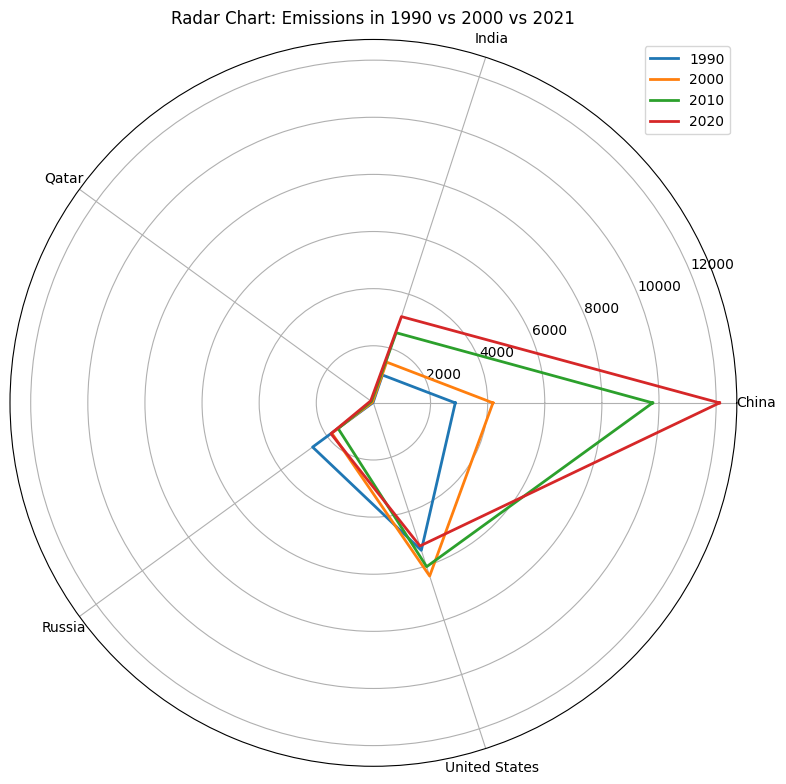

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Pick years to compare (1990, 2000, 2021)
years = [1990, 2000, 2010, 2020]
radar_df = df[df['Year'].isin(years) & df['Country'].isin(focus)]
radar_df = radar_df.pivot(index='Country', columns='Year', values='Emissions').fillna(0)

# Radar setup
labels = radar_df.index.tolist()
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 8))
for year in years:
    values = radar_df[year].tolist()
    values += values[:1]
    plt.polar(angles, values, label=str(year), linewidth=2)

plt.xticks(angles[:-1], labels)
plt.title("Radar Chart: Emissions in 1990 vs 2000 vs 2021")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


<Axes: >

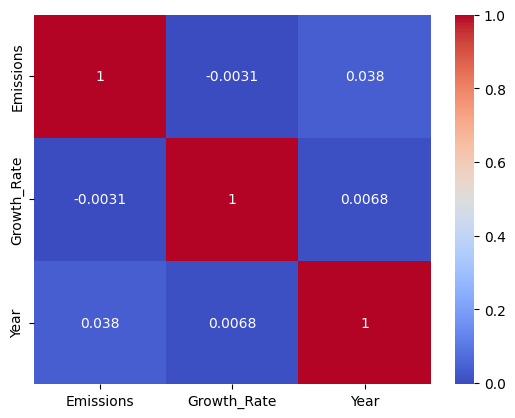

In [30]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


In [35]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', "CÃƒÂ´te d'Ivoire",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
     

In [36]:
# Step 1: Define a dictionary mapping countries to continents
continent_map = {
    # ASIA
    'Afghanistan': 'Asia', 'Armenia': 'Asia', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia',
    'Bangladesh': 'Asia', 'Bhutan': 'Asia', 'Brunei': 'Asia', 'Cambodia': 'Asia',
    'China': 'Asia', 'Cyprus': 'Asia', 'Georgia': 'Asia', 'India': 'Asia', 'Indonesia': 'Asia',
    'Iran': 'Asia', 'Iraq': 'Asia', 'Israel': 'Asia', 'Japan': 'Asia', 'Jordan': 'Asia',
    'Kazakhstan': 'Asia', 'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia', 'Laos': 'Asia',
    'Lebanon': 'Asia', 'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mongolia': 'Asia',
    'Myanmar': 'Asia', 'Nepal': 'Asia', 'North Korea': 'Asia', 'Oman': 'Asia', 'Pakistan': 'Asia',
    'Palestine': 'Asia', 'Philippines': 'Asia', 'Qatar': 'Asia', 'Saudi Arabia': 'Asia',
    'Singapore': 'Asia', 'South Korea': 'Asia', 'Sri Lanka': 'Asia', 'Syria': 'Asia',
    'Tajikistan': 'Asia', 'Thailand': 'Asia', 'Timor-Leste': 'Asia', 'Turkey': 'Asia',
    'Turkmenistan': 'Asia', 'United Arab Emirates': 'Asia', 'Uzbekistan': 'Asia',
    'Vietnam': 'Asia', 'Yemen': 'Asia',

    # AFRICA
    'Algeria': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa', 'Botswana': 'Africa',
    'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cabo Verde': 'Africa',
    "Côte d'Ivoire": 'Africa', 'Cameroon': 'Africa', 'Central African Republic': 'Africa',
    'Chad': 'Africa', 'Comoros': 'Africa', 'Congo': 'Africa', 'Democratic Republic of the Congo': 'Africa',
    'Djibouti': 'Africa', 'Egypt': 'Africa', 'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa',
    'Eswatini': 'Africa', 'Ethiopia': 'Africa', 'Gabon': 'Africa', 'Gambia': 'Africa',
    'Ghana': 'Africa', 'Guinea': 'Africa', 'Guinea-Bissau': 'Africa', 'Kenya': 'Africa',
    'Lesotho': 'Africa', 'Liberia': 'Africa', 'Libya': 'Africa', 'Madagascar': 'Africa',
    'Malawi': 'Africa', 'Mali': 'Africa', 'Mauritania': 'Africa', 'Mauritius': 'Africa',
    'Morocco': 'Africa', 'Mozambique': 'Africa', 'Namibia': 'Africa', 'Niger': 'Africa',
    'Nigeria': 'Africa', 'Rwanda': 'Africa', 'São Tomé and Principe': 'Africa',
    'Senegal': 'Africa', 'Seychelles': 'Africa', 'Sierra Leone': 'Africa', 'Somalia': 'Africa',
    'South Africa': 'Africa', 'South Sudan': 'Africa', 'Sudan': 'Africa', 'Tanzania': 'Africa',
    'Togo': 'Africa', 'Tunisia': 'Africa', 'Uganda': 'Africa', 'Zambia': 'Africa', 'Zimbabwe': 'Africa',

    # NORTH AMERICA
    'Antigua and Barbuda': 'North America', 'Bahamas': 'North America', 'Barbados': 'North America',
    'Belize': 'North America', 'Canada': 'North America', 'Costa Rica': 'North America',
    'Cuba': 'North America', 'Dominica': 'North America', 'Dominican Republic': 'North America',
    'El Salvador': 'North America', 'Grenada': 'North America', 'Guatemala': 'North America',
    'Haiti': 'North America', 'Honduras': 'North America', 'Jamaica': 'North America',
    'Mexico': 'North America', 'Nicaragua': 'North America', 'Panama': 'North America',
    'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America', 'Trinidad and Tobago': 'North America',
    'United States': 'North America',

    # SOUTH AMERICA
    'Argentina': 'South America', 'Bolivia': 'South America', 'Brazil': 'South America',
    'Chile': 'South America', 'Colombia': 'South America', 'Ecuador': 'South America',
    'Guyana': 'South America', 'Paraguay': 'South America', 'Peru': 'South America',
    'Suriname': 'South America', 'Uruguay': 'South America', 'Venezuela': 'South America',

    # EUROPE
    'Albania': 'Europe', 'Andorra': 'Europe', 'Austria': 'Europe', 'Belarus': 'Europe',
    'Belgium': 'Europe', 'Bosnia and Herzegovina': 'Europe', 'Bulgaria': 'Europe',
    'Croatia': 'Europe', 'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Estonia': 'Europe',
    'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe',
    'Hungary': 'Europe', 'Iceland': 'Europe', 'Ireland': 'Europe', 'Italy': 'Europe',
    'Latvia': 'Europe', 'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Malta': 'Europe', 'Moldova': 'Europe', 'Monaco': 'Europe', 'Montenegro': 'Europe',
    'Netherlands': 'Europe', 'North Macedonia': 'Europe', 'Norway': 'Europe', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Romania': 'Europe', 'Russia': 'Europe', 'San Marino': 'Europe',
    'Serbia': 'Europe', 'Slovakia': 'Europe', 'Slovenia': 'Europe', 'Spain': 'Europe',
    'Sweden': 'Europe', 'Switzerland': 'Europe', 'Ukraine': 'Europe', 'United Kingdom': 'Europe',

    # AUSTRALIA
    'Australia': 'Australia', 'Fiji': 'Australia', 'Kiribati': 'Australia', 'Marshall Islands': 'Australia',
    'Micronesia': 'Australia', 'Nauru': 'Australia', 'New Zealand': 'Australia', 'Palau': 'Australia',
    'Papua New Guinea': 'Australia', 'Samoa': 'Australia', 'Solomon Islands': 'Australia',
    'Tonga': 'Australia', 'Tuvalu': 'Australia', 'Vanuatu': 'Australia', 'Cook Islands': 'Australia',
    'Niue': 'Australia',

    # ANTARCTICA
    # If your dataset includes data for Antarctica or countries with bases there, you can map here
    # Otherwise, you can skip
}

# Step 2: Apply the mapping
df['Region'] = df['Country'].map(continent_map)

# Optional: Fill missing with 'Unknown'
df['Region'] = df['Region'].fillna('Unknown')

# Step 3: Check how it looks
print(df[['Country', 'Region']].drop_duplicates().head(20))


                 Country         Region
0            Afghanistan           Asia
32               Albania         Europe
64               Algeria         Africa
96               Andorra         Europe
128               Angola         Africa
160  Antigua and Barbuda  North America
192            Argentina  South America
224              Armenia           Asia
256            Australia      Australia
288              Austria         Europe
320           Azerbaijan           Asia
352              Bahamas  North America
384              Bahrain           Asia
416           Bangladesh           Asia
448             Barbados  North America
480              Belarus         Europe
512              Belgium         Europe
544               Belize  North America
576                Benin         Africa
608               Bhutan           Asia


C:\Users\MOHAMMAD FAIZ JABIR\AppData\Local\Temp\ipykernel_43124\2603126222.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_total, x='Region', y='Emissions', palette='Set2')


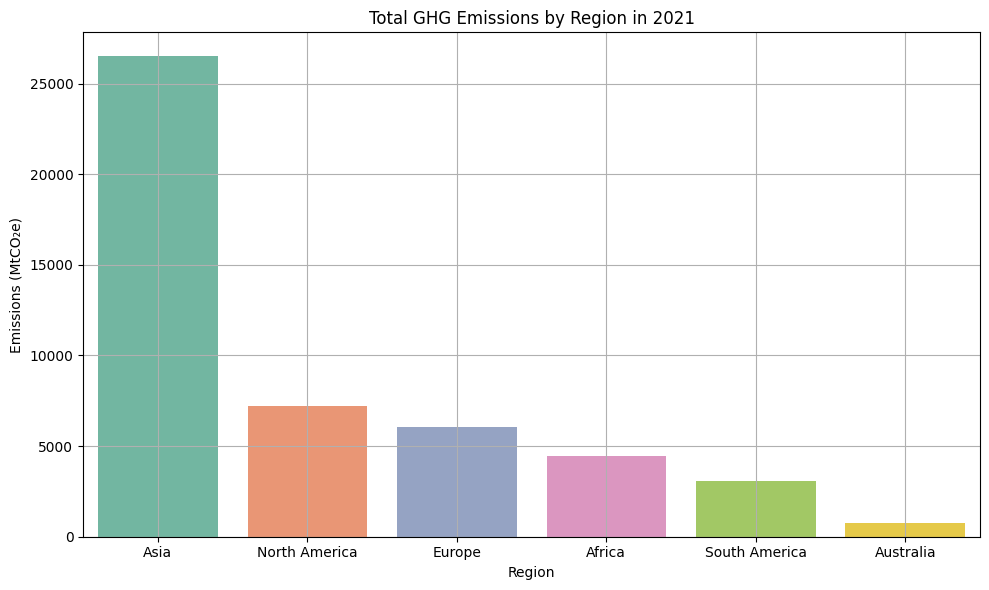

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Keep only valid regions
valid_regions = ['Asia', 'Africa', 'Europe', 'North America', 'South America', 'Australia']
df = df[df['Region'].isin(valid_regions)]

# Get latest year
latest_year = df['Year'].max()
df_latest = df[df['Year'] == latest_year]

# Sum emissions by region
region_total = df_latest.groupby('Region')['Emissions'].sum().sort_values(ascending=False).reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=region_total, x='Region', y='Emissions', palette='Set2')
plt.title(f"Total GHG Emissions by Region in {latest_year}")
plt.ylabel("Emissions (MtCO₂e)")
plt.xlabel("Region")
plt.grid(True)
plt.tight_layout()
plt.show()


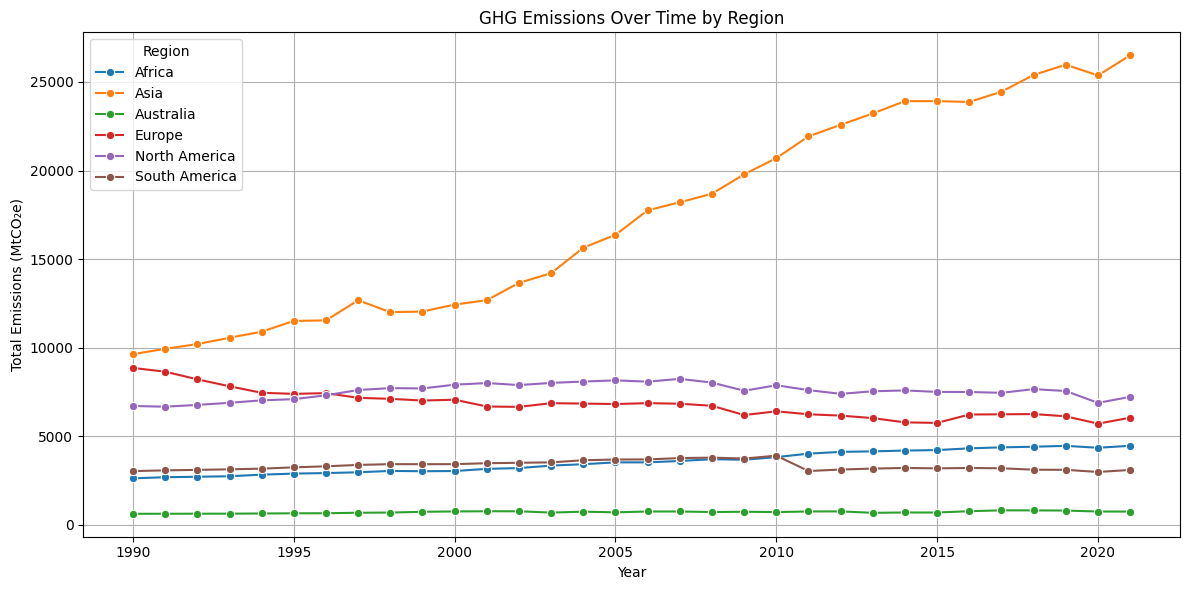

In [38]:
# Group by region and year
region_trends = df.groupby(['Region', 'Year'])['Emissions'].sum().reset_index()

# Plot line plot for each region
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_trends, x='Year', y='Emissions', hue='Region', marker='o')
plt.title("GHG Emissions Over Time by Region")
plt.ylabel("Total Emissions (MtCO₂e)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\MOHAMMAD FAIZ JABIR\AppData\Local\Temp\ipykernel_43124\727885918.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\MOHAMMAD FAIZ JABIR\AppData\Local\Temp\ipykernel_43124\727885918.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated.

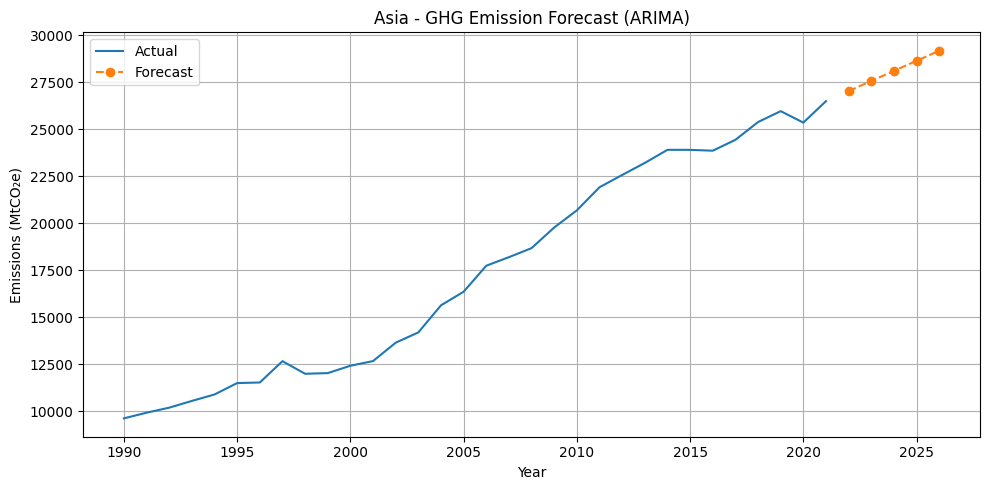

c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarni

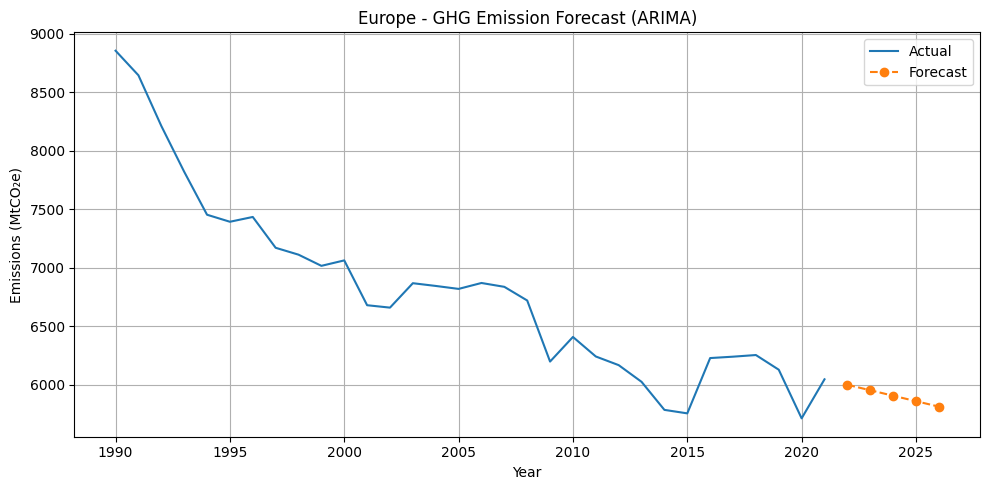

c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWa

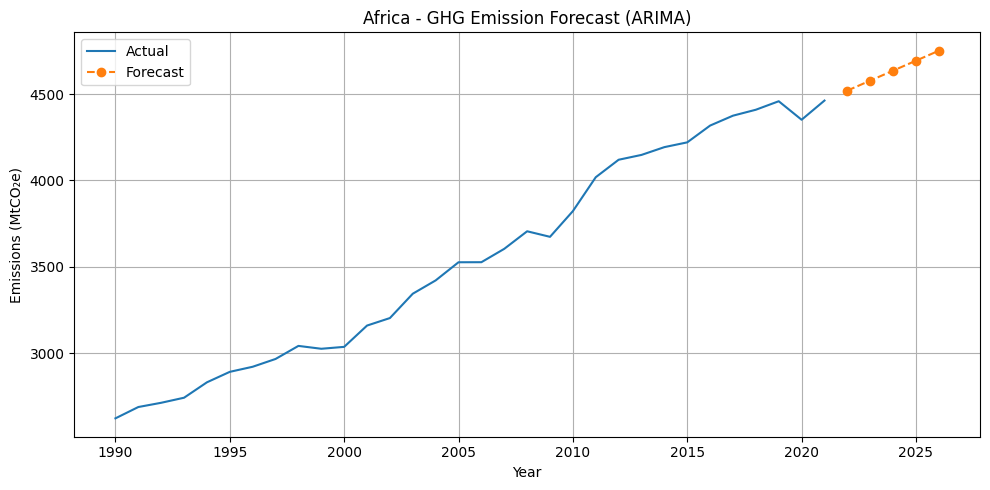

c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWa

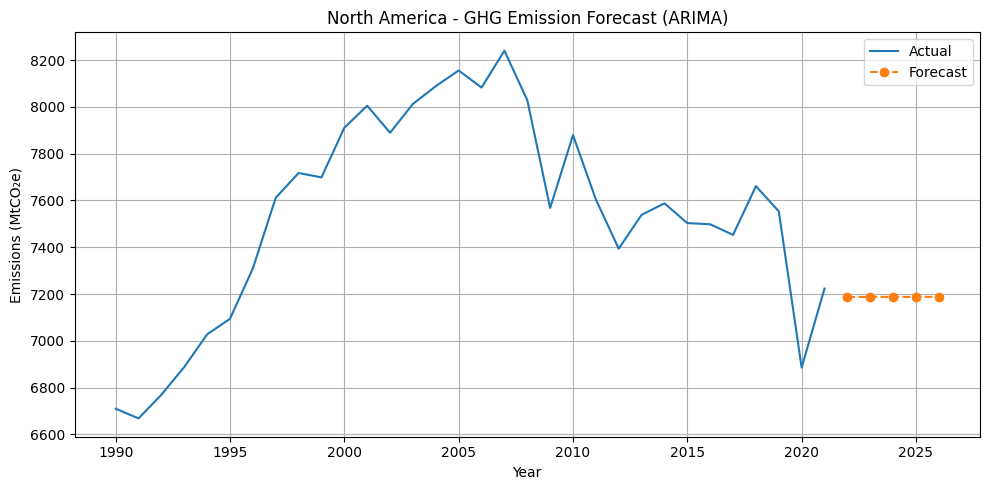

c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarni

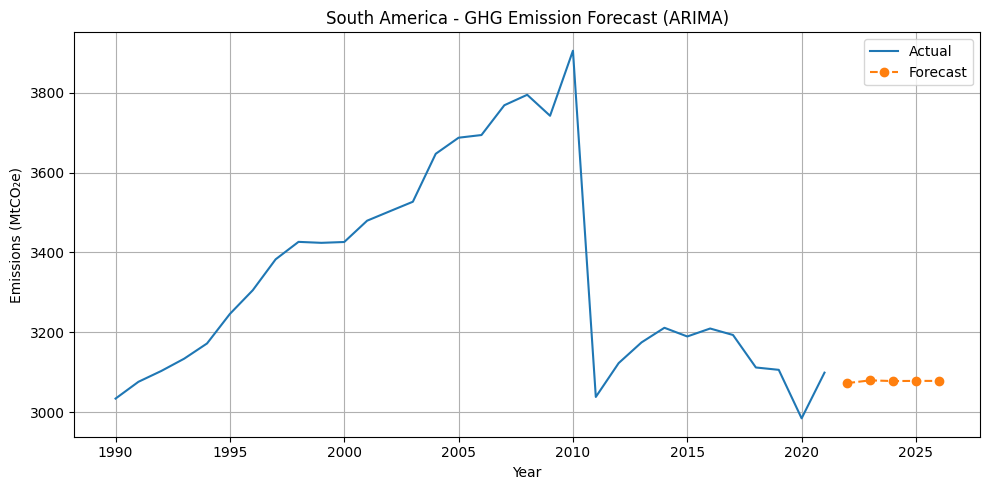

c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\MOHAMMAD FAIZ JABIR\code\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWa

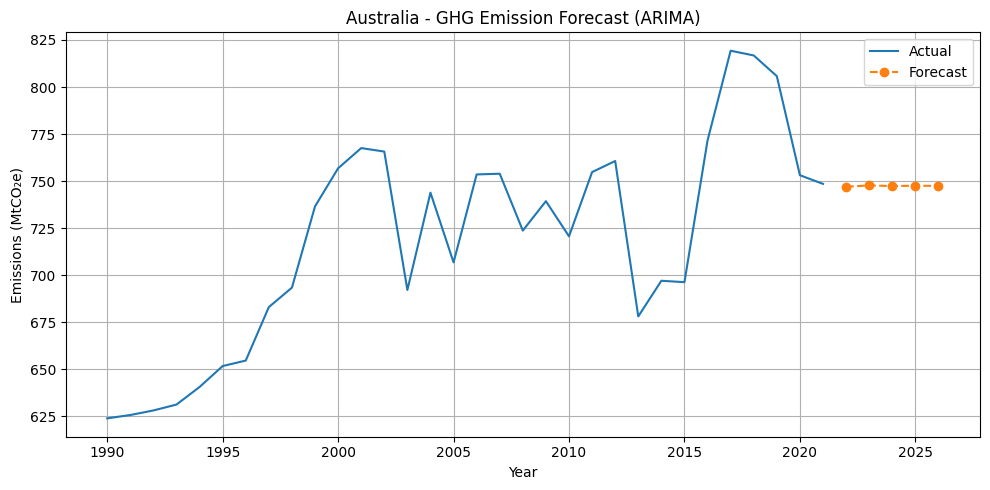

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Year and Region exist
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Prepare final results
region_forecasts = []
regions = df['Region'].dropna().unique()

for region in regions:
    try:
        # Group emissions per year for the region
        ts = df[df['Region'] == region].groupby('Year')['Emissions'].sum()
        
        # Fit ARIMA
        model = ARIMA(ts, order=(1, 1, 1))
        model_fit = model.fit()
        
        # Forecast 5 years
        forecast = model_fit.forecast(steps=5)
        forecast_years = pd.date_range(start=f"{ts.index.max()+1}-01-01", periods=5, freq='YS').year

        # Store forecast
        forecast_df = pd.DataFrame({
            'Region': region,
            'Year': forecast_years,
            'Forecasted_Emissions': forecast.values
        })
        region_forecasts.append(forecast_df)

        # Plot
        plt.figure(figsize=(10, 5))
        plt.plot(ts.index, ts.values, label='Actual')
        plt.plot(forecast_years, forecast, label='Forecast', linestyle='--', marker='o')
        plt.title(f"{region} - GHG Emission Forecast (ARIMA)")
        plt.xlabel("Year")
        plt.ylabel("Emissions (MtCO₂e)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f" Could not forecast {region}: {e}")

# Combine forecasts into a single DataFrame
forecast_all_regions = pd.concat(region_forecasts)


In [40]:
print(forecast_all_regions)

          Region  Year  Forecasted_Emissions
0           Asia  2022          27042.778136
1           Asia  2023          27579.408187
2           Asia  2024          28116.010153
3           Asia  2025          28652.584037
4           Asia  2026          29189.129840
0         Europe  2022           5998.810799
1         Europe  2023           5952.044591
2         Europe  2024           5905.321338
3         Europe  2025           5858.640999
4         Europe  2026           5812.003536
0         Africa  2022           4519.844007
1         Africa  2023           4577.507876
2         Africa  2024           4635.171608
3         Africa  2025           4692.835202
4         Africa  2026           4750.498659
0  North America  2022           7187.288866
1  North America  2023           7187.991780
2  North America  2024           7187.978195
3  North America  2025           7187.978457
4  North America  2026           7187.978452
0  South America  2022           3072.716704
1  South A

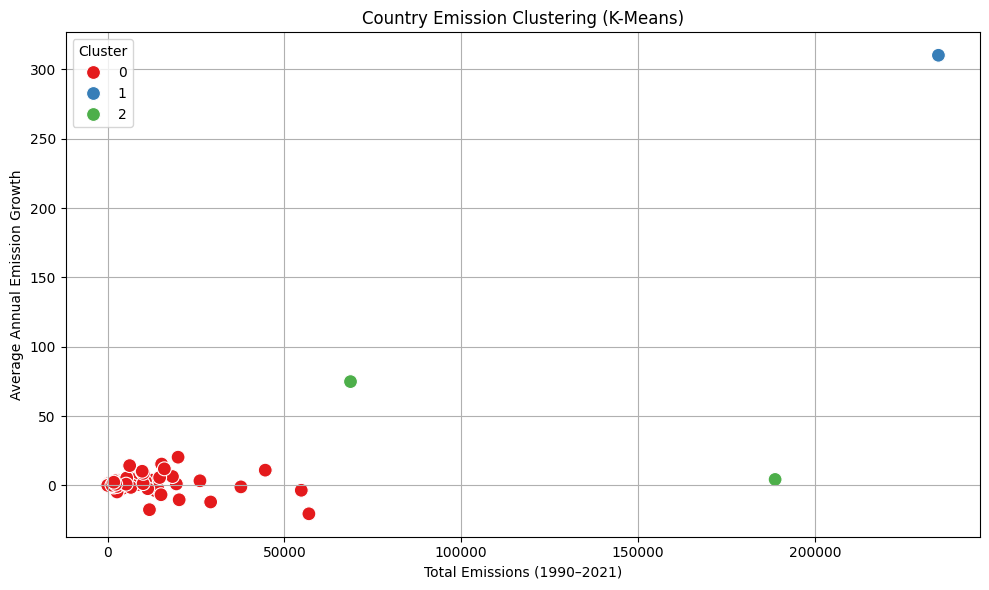

,Country,Total_Emissions,Growth_Rate,Cluster
0,Afghanistan,658.80,0.810625,0
1,Albania,261.50,-0.086875,0
2,Algeria,6219.32,4.724375,0
3,Andorra,17.94,0.001875,0
4,Angola,3574.27,1.710000,0
5,Antigua and Barbuda,27.96,0.032187,0
6,Argentina,12435.42,3.749063,0
7,Armenia,293.52,-0.420000,0
8,Australia,19439.05,1.019063,0
9,Austria,2278.25,0.125313,0


In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate emissions per country
country_summary = df.groupby('Country').agg(
    Total_Emissions=('Emissions', 'sum'),
    First_Year=('Date', lambda x: x.min().year),
    Last_Year=('Date', lambda x: x.max().year)
).reset_index()

# Step 2: Calculate annual average growth
country_yearly = df.groupby(['Country', 'Year'])['Emissions'].sum().reset_index()
growth_rates = []

for country in country_yearly['Country'].unique():
    country_data = country_yearly[country_yearly['Country'] == country]
    if len(country_data) > 1:
        growth = (country_data['Emissions'].values[-1] - country_data['Emissions'].values[0]) / len(country_data)
        growth_rates.append((country, growth))
    else:
        growth_rates.append((country, 0))

growth_df = pd.DataFrame(growth_rates, columns=['Country', 'Growth_Rate'])

# Merge growth rate
country_summary = country_summary.merge(growth_df, on='Country')

# Step 3: Prepare features for clustering
features = country_summary[['Total_Emissions', 'Growth_Rate']].fillna(0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 4: K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
country_summary['Cluster'] = kmeans.fit_predict(features_scaled)

# Step 5: Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=country_summary,
    x='Total_Emissions', y='Growth_Rate',
    hue='Cluster', palette='Set1', s=100
)
plt.title("Country Emission Clustering (K-Means)")
plt.xlabel("Total Emissions (1990–2021)")
plt.ylabel("Average Annual Emission Growth")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: See which countries are in which cluster
cluster_summary = country_summary[['Country', 'Total_Emissions', 'Growth_Rate', 'Cluster']].sort_values(by='Cluster')
cluster_summary.head(10)


In [46]:
from sklearn.preprocessing import LabelEncoder

df['Region'] = df['Region'].fillna("Unknown")  # If you added Region mapping
le_country = LabelEncoder()
le_region = LabelEncoder()
df['Country_encoded'] = le_country.fit_transform(df['Country'])
df['Region_encoded'] = le_region.fit_transform(df['Region'])




In [47]:
# Replace infinity values with NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Drop rows where features or target are missing
features = ['Year', 'Country_encoded', 'Region_encoded', 'Growth_Rate']
df = df.dropna(subset=features + ['Emissions'])

X = df[features]
y = df['Emissions']


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(" RMSE:", rmse)
print(" R² Score:", r2)


 RMSE: 34.502786610488684
 R² Score: 0.9975605113197293


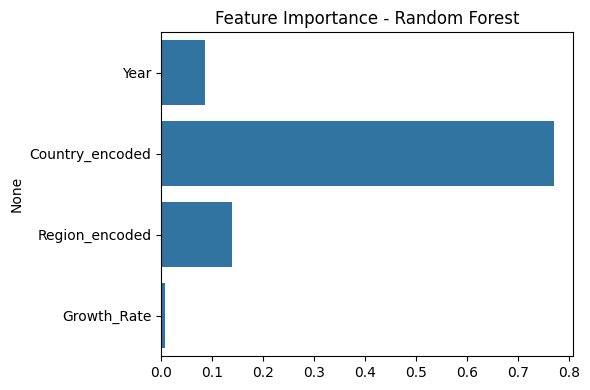

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.Series(model.feature_importances_, index=features)

plt.figure(figsize=(6, 4))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


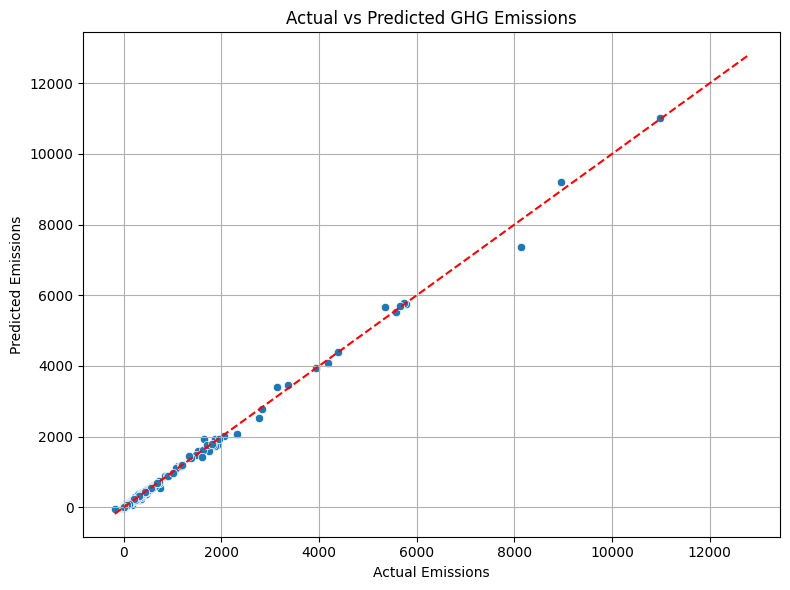

     Country_encoded  Region_encoded  Forecast_Emissions
1                  0               1             35.3323
33                 1               3              8.6452
65                 2               0            268.4096
97                 3               3              0.5201
129                4               0            129.5807


In [51]:

# Step 8: Forecast emissions for 2025
future_year = 2025
future_data = df[['Country_encoded', 'Region_encoded']].drop_duplicates()
future_data['Year'] = future_year
future_data['Growth_Rate'] = 0  # You can change this assumption
X_future = future_data[features]
future_data['Forecast_Emissions'] = model.predict(X_future)

# Step 9: Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Emissions")
plt.ylabel("Predicted Emissions")
plt.title("Actual vs Predicted GHG Emissions")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 10: Show 2025 forecast results
print(future_data[['Country_encoded', 'Region_encoded', 'Forecast_Emissions']].head())

In [54]:
# Replace with the country you want
target_country = "Qatar"
target_year = 2023

# Encode the country and region like training
country_code = le_country.transform([target_country])[0]
region_code = le_region.transform([df[df['Country'] == target_country]['Region'].iloc[0]])[0]

# Assume average growth rate of that country from historical data
avg_growth = df[df['Country'] == target_country]['Growth_Rate'].mean()

# Create prediction input
X_future = pd.DataFrame([{
    'Year': target_year,
    'Country_encoded': country_code,
    'Region_encoded': region_code,
    'Growth_Rate': avg_growth
}])

# Predict
predicted_emission = model.predict(X_future)[0]
print(f"Predicted GHG Emissions for {target_country} in {target_year}: {predicted_emission:.2f} MtCO₂e")


Predicted GHG Emissions for Qatar in 2023: 121.66 MtCO₂e
